In [1]:
#classification code below


(60000, 28, 28)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7289 - loss: 0.7508 - val_accuracy: 0.8622 - val_loss: 0.3835
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8371 - loss: 0.4417 - val_accuracy: 0.8712 - val_loss: 0.3629
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8533 - loss: 0.4017 - val_accuracy: 0.8784 - val_loss: 0.3466
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8621 - loss: 0.3792 - val_accuracy: 0.8776 - val_loss: 0.3336
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8640 - loss: 0.3628 - val_accuracy: 0.8814 - val_loss: 0.3268
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8710 - loss: 0.3484 - val_accuracy: 0.8756 - val_loss: 0.3327
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8724 - loss: 0.3409 - val_accuracy: 0.8816 - val_loss: 0.3202
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8772 - loss: 0.3327 

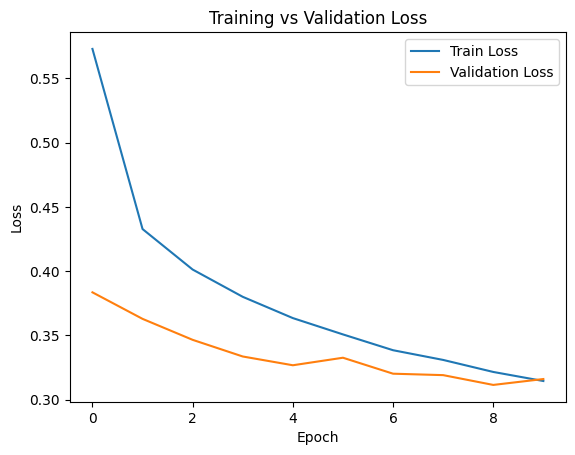

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 0.877
Test MSE: 0.01764402411167938


In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout


fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


X_train, X_valid = X_train_full[5000:] / 255.0, X_train_full[:5000] / 255.0
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]

print(X_train_full.shape)

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    verbose=1
)


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()


X_test_scaled = X_test / 255.0
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(tf.keras.utils.to_categorical(y_test), y_pred_prob))


In [ ]:
#regression

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(30, activation='relu', input_dim=8),
    Dense(1)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])


history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=20, verbose=1)


mse_test, mae_test = model.evaluate(X_test_scaled, y_test)
print(f"Test MSE: {mse_test:.4f}, Test MAE: {mae_test:.4f}")


y_pred = model.predict(X_test_scaled[:5])
print("Predictions:", y_pred.flatten())
print("True values:", y_test[:5])

y_test_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_test_pred)
print(f"R^2 score on test set: {r2:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.4268 - mae: 1.6537 - val_loss: 0.7502 - val_mae: 0.6192
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6579 - mae: 0.5950 - val_loss: 0.5184 - val_mae: 0.5217
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5151 - mae: 0.5248 - val_loss: 0.5574 - val_mae: 0.4853
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4492 - mae: 0.4826 - val_loss: 0.5764 - val_mae: 0.4667
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4270 - mae: 0.4692 - val_loss: 0.8091 - val_mae: 0.4547
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4091 - mae: 0.4547 - val_loss: 0.3739 - val_mae: 0.4347
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3929 - mae: 0.4453 - val_loss: 0.4883 - val_mae: 0.4332
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3828 - mae: 0.4430 - val_loss: 0.3557 - val_mae: 0.4299
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing()
print(housing)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_train_scaled)

(11610, 8)
[[-0.19397883 -1.07781319 -0.94338545 ... -0.57291624  0.92926047
  -1.42215523]
 [ 0.75198318 -1.868895    0.40547793 ...  0.20516532 -0.91654738
   1.09666969]
 [-0.41469108  0.02970134  0.81808819 ... -0.29983271  1.30872858
  -1.697027  ]
 ...
 [-1.22332336  0.50435042 -0.51600328 ...  0.1344908  -0.71978613
   1.14664638]
 [-0.93556989  1.8491895  -0.10878451 ... -0.01354498  0.52168361
  -0.10277075]
 [ 0.89585991  0.1879177   0.29947528 ... -0.17823425  1.12133692
  -1.30720885]]
